# Benchmarking classification models on MNIST-1D

In [1]:
# Run this cell if you are in Colab 
# (otherwise make sure to do python -m pip install mnist1d first)

#!python -m pip install git+https://github.com/greydanus/mnist1d.git@master
    
# Download repo directly (gives access to notebooks/models.py and notebooks/train.py)
# !git clone https://github.com/greydanus/mnist1d

In [3]:
import sys
sys.path.append('./mnist1d/notebooks/')
sys.path.append('./mnist1d/mnist1d/')

from models import ConvBase, MLPBase, LinearBase, GRUBase
from train import get_model_args, train_model
from mnist1d.utils import set_seed

import torch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
# Load MNIST-1D
# (loading from the web to make running in a Colab easier)

from urllib.request import urlopen
import pickle

url = 'https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl'
data = pickle.load(urlopen(url))

## Run the benchmarks

In [6]:
# Note: if you run on a GPU, the walltimes will be _much_ lower

args = get_model_args()
args.total_steps = 6000
args.device = DEVICE

set_seed(args.seed)
model = ConvBase(output_size=args.output_size)
results_cnn = train_model(data, model, args)
print()

set_seed(args.seed)
model = GRUBase(input_size=1, output_size=args.output_size)
results_gru = train_model(data, model, args)
print()

set_seed(args.seed)
model = MLPBase(args.input_size, args.output_size)
results_mlp = train_model(data, model, args)
print()

set_seed(args.seed)
model = LinearBase(args.input_size, args.output_size)
results_lin = train_model(data, model, args)

Initialized ConvBase model with 5210 parameters
step 1000, dt 1.83s, train_loss 1.158e-01, test_loss 3.517e-01, train_acc 96.5, test_acc 87.9
step 2000, dt 1.79s, train_loss 2.384e-02, test_loss 4.325e-01, train_acc 99.0, test_acc 90.8
step 3000, dt 1.84s, train_loss 3.321e-02, test_loss 4.907e-01, train_acc 98.6, test_acc 90.6
step 4000, dt 1.92s, train_loss 6.015e-04, test_loss 4.824e-01, train_acc 100.0, test_acc 92.2
step 5000, dt 2.06s, train_loss 2.361e-04, test_loss 5.045e-01, train_acc 100.0, test_acc 91.9
step 6000, dt 1.96s, train_loss 1.257e-04, test_loss 5.231e-01, train_acc 100.0, test_acc 92.3

Initialized GRUBase model with 5134 parameters
step 1000, dt 22.64s, train_loss 1.753e-01, test_loss 4.227e-01, train_acc 92.3, test_acc 86.1
step 2000, dt 26.65s, train_loss 1.234e-01, test_loss 5.126e-01, train_acc 93.8, test_acc 86.5
step 3000, dt 25.23s, train_loss 6.646e-02, test_loss 4.873e-01, train_acc 98.8, test_acc 89.2
step 4000, dt 27.12s, train_loss 2.809e-02, test_los

In [14]:
# Shuffle the pixels

import numpy as np

np.random.seed(42)
shuffled_order = np.random.permutation(data['x'].shape[1])

data_shuff = data.copy()
data_shuff['x'] = data_shuff['x'][:, shuffled_order]
data_shuff['x_test'] = data_shuff['x_test'][:, shuffled_order]

In [15]:
set_seed(args.seed)
model = ConvBase(output_size=args.output_size)
results_cnn_shuff = train_model(data_shuff, model, args)
print()

set_seed(args.seed)
model = GRUBase(input_size=1, output_size=args.output_size)
results_gru_shuff = train_model(data_shuff, model, args)
print()

set_seed(args.seed)
model = MLPBase(args.input_size, args.output_size)
results_mlp_shuff = train_model(data_shuff, model, args)
print()

set_seed(args.seed)
model = LinearBase(args.input_size, args.output_size)
results_lin_shuff = train_model(data_shuff, model, args)

Initialized ConvBase model with 5210 parameters
step 1000, dt 1.80s, train_loss 5.503e-01, test_loss 1.630e+00, train_acc 73.0, test_acc 53.3
step 2000, dt 1.83s, train_loss 2.484e-01, test_loss 2.053e+00, train_acc 83.4, test_acc 56.6
step 3000, dt 2.02s, train_loss 4.203e-01, test_loss 2.405e+00, train_acc 83.3, test_acc 54.7
step 4000, dt 2.01s, train_loss 2.079e-01, test_loss 3.117e+00, train_acc 90.7, test_acc 57.7
step 5000, dt 1.95s, train_loss 1.932e-01, test_loss 3.580e+00, train_acc 90.4, test_acc 58.3
step 6000, dt 2.01s, train_loss 1.257e-01, test_loss 4.385e+00, train_acc 92.0, test_acc 58.7

Initialized GRUBase model with 5134 parameters
step 1000, dt 26.13s, train_loss 7.978e-01, test_loss 1.129e+00, train_acc 72.8, test_acc 56.8
step 2000, dt 33.21s, train_loss 6.272e-01, test_loss 1.417e+00, train_acc 80.9, test_acc 56.2
step 3000, dt 29.63s, train_loss 5.342e-01, test_loss 1.577e+00, train_acc 84.4, test_acc 55.8
step 4000, dt 31.62s, train_loss 5.860e-01, test_loss 1

## Construct the figure

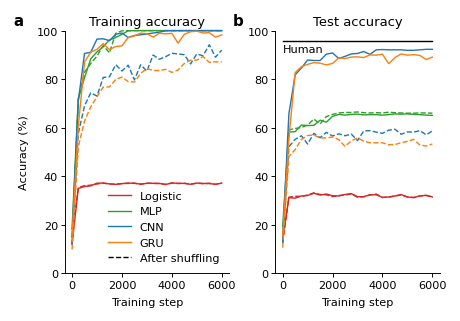

In [60]:
import pylab as plt

# Figure style (loading from the web to make running in a Colab easier)
plt.style.use('https://github.com/greydanus/mnist1d/raw/master/notebooks/mpl_style.txt')

fig, axs = plt.subplots(ncols=2, figsize=(3.25, 2.25))

steps = 6000
eval_every = 250
t = range(0, steps + 1, eval_every)

axs[0].plot(t, results_lin['train_acc'], '-', color='tab:red', label='Logistic')
axs[0].plot(t, results_lin_shuff['train_acc'], '--', color='tab:red')

axs[0].plot(t, results_mlp['train_acc'], '-', color='tab:green', label='MLP', clip_on=False)
axs[0].plot(t, results_mlp_shuff['train_acc'], '--', color='tab:green', clip_on=False)

axs[0].plot(t, results_cnn['train_acc'], '-', color='tab:blue', label='CNN', clip_on=False)
axs[0].plot(t, results_cnn_shuff['train_acc'], '--', color='tab:blue', clip_on=False)

axs[0].plot(t, results_gru['train_acc'], '-', color='tab:orange', label='GRU', clip_on=False)
axs[0].plot(t, results_gru_shuff['train_acc'], '--', color='tab:orange', clip_on=False)

axs[0].plot(t, [-1] * len(t), 'k--', label='After shuffling')

###

axs[1].plot(t, results_lin['test_acc'], '-', color='tab:red', label='logistic')
axs[1].plot(t, results_lin_shuff['test_acc'], '--', color='tab:red')

axs[1].plot(t, results_mlp['test_acc'], '-', color='tab:green', label='mlp')
axs[1].plot(t, results_mlp_shuff['test_acc'], '--', color='tab:green')

axs[1].plot(t, results_cnn['test_acc'], '-', color='tab:blue', label='cnn')
axs[1].plot(t, results_cnn_shuff['test_acc'], '--', color='tab:blue')

axs[1].plot(t, results_gru['test_acc'], '-', color='tab:orange', label='gru')
axs[1].plot(t, results_gru_shuff['test_acc'], '--', color='tab:orange')

axs[1].plot(t, [95.8] * len(t), 'k-')
axs[1].text(0, 91, 'Human')

axs[0].set_title('Training accuracy')
axs[1].set_title('Test accuracy')
axs[1].set_xlabel("Training step")
axs[0].set_xlabel("Training step")
axs[0].set_ylabel("Accuracy (%)")
axs[0].legend()
axs[0].set_ylim(0, 100)
axs[1].set_ylim(0, 100)

fig.text(0, .95, 'a', fontsize=8, weight='bold')
fig.text(.5, .95, 'b', fontsize=8, weight='bold')

plt.show()

fig.savefig('figures/benchmark.png', dpi=300)
fig.savefig('figures/benchmark.pdf')